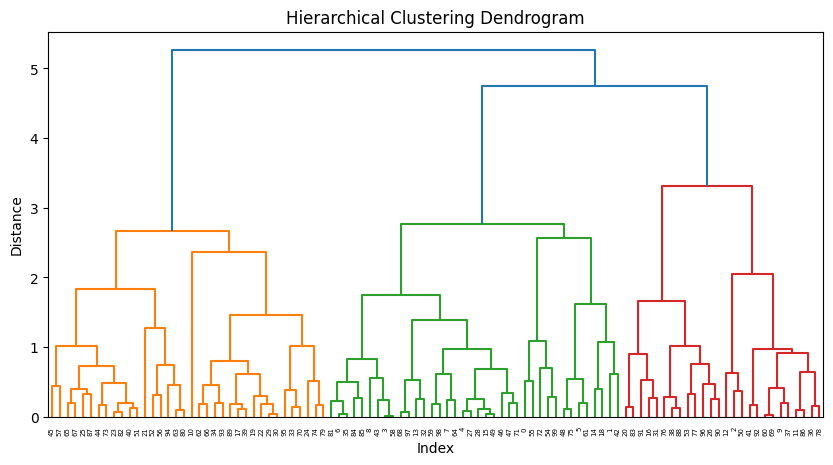

In [3]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
X = np.random.randn(100, 2)

# Perform hierarchical clustering
linkage_matrix = linkage(X, method='complete')  # You can choose different linkage methods
clustering = AgglomerativeClustering(n_clusters=3)
clustering.fit(X)

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

Dataset saved as 'preferred_product_category.csv'


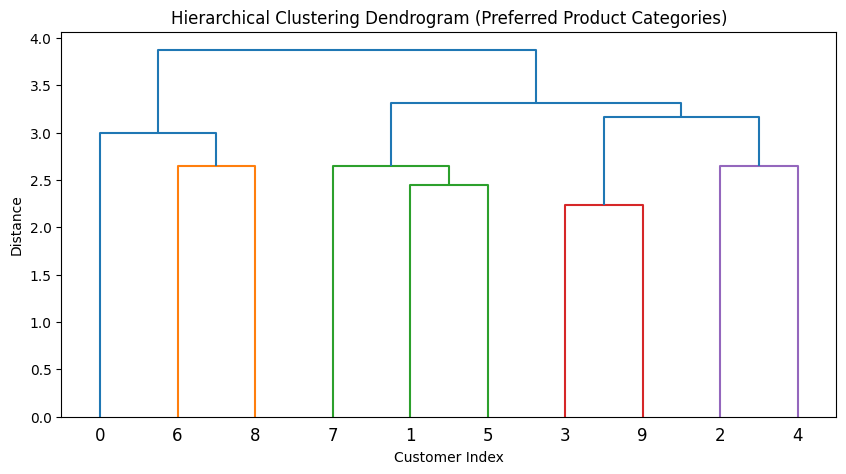

In [4]:
# Step 1: Import necessary libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


print("Dataset saved as 'preferred_product_category.csv'")

# Step 4: Load the dataset from the CSV file
df = pd.read_csv('preferred_product_category.csv')
X = df.drop(columns=['CustomerID']).values  # Exclude CustomerID for clustering

# Step 5: Perform hierarchical clustering
linkage_matrix = linkage(X, method='complete')  # Linkage method can be 'ward', 'single', 'average', etc.
clustering = AgglomerativeClustering(n_clusters=3)
clustering.fit(X)

# Step 6: Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Preferred Product Categories)')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()



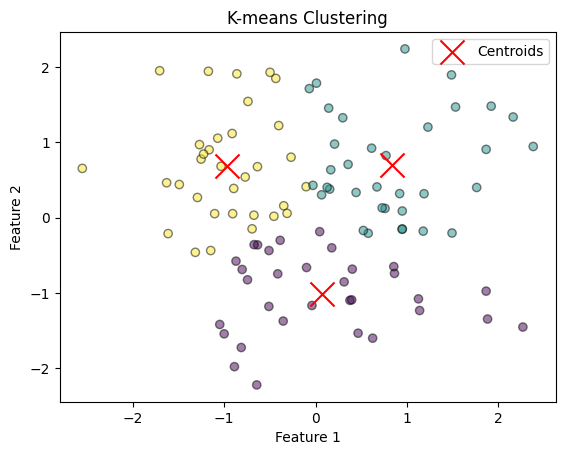

Data with cluster labels saved to 'clustered_data.csv'
Centroids saved to 'centroids.csv'
Nearest data points saved to 'nearest_data_points.csv'


In [7]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist

# Generate sample data
np.random.seed(0)
X = np.random.randn(100, 2)

# Instantiate KMeans with the desired number of clusters (k)
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the data and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=300, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Find the nearest data point for each centroid
distances = cdist(X, centroids, 'euclidean')  # Calculate Euclidean distances from points to centroids
nearest_points = np.argmin(distances, axis=0)  # Get the index of the nearest point for each centroid

# Add the nearest points to the DataFrame
nearest_data_points = X[nearest_points]
nearest_data_points_df = pd.DataFrame(nearest_data_points, columns=['Nearest_Feature1', 'Nearest_Feature2'])
nearest_data_points_df['Cluster'] = range(len(centroids))

# Save data and clustering results to CSV
data_with_clusters = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data_with_clusters['Cluster'] = labels
centroids_df = pd.DataFrame(centroids, columns=['Centroid_Feature1', 'Centroid_Feature2'])
data_with_clusters.to_csv('clustered_data.csv', index=False)
centroids_df.to_csv('centroids.csv', index=False)
nearest_data_points_df.to_csv('nearest_data_points.csv', index=False)

print("Data with cluster labels saved to 'clustered_data.csv'")
print("Centroids saved to 'centroids.csv'")
print("Nearest data points saved to 'nearest_data_points.csv'")


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Instantiate KMedoids with 4 clusters
kmedoids = KMedoids(n_clusters=4, random_state=0)

# Fit the model to the data
kmedoids.fit(X)

# Get cluster labels and medoids
labels = kmedoids.labels_
medoid_indices = kmedoids.medoid_indices_
medoids = X[medoid_indices]

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', s=200, marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Medoids Clustering')
plt.show() 

ModuleNotFoundError: No module named 'sklearn_extra'

['y', 'b', 'g', 'r']


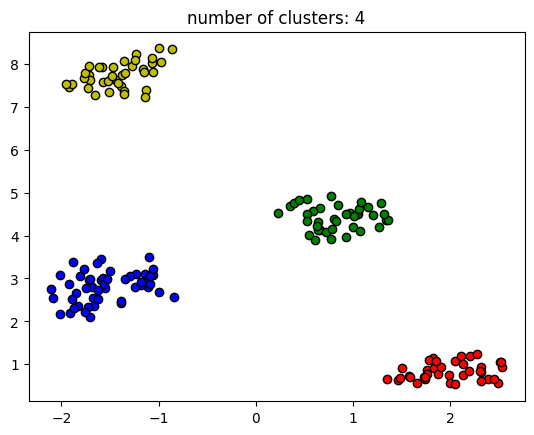

In [1]:
#DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
# Load data in X
X, y_true = make_blobs(n_samples=300, centers=4,
					cluster_std=0.50, random_state=0)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	

plt.title('number of clusters: %d' % n_clusters_)
plt.show()